In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
import sys
import pandas as pd

In [ ]:
## 도트 이미지 만들기 출처 
## https://www.youtube.com/watch?v=TrRyXUTcMj8

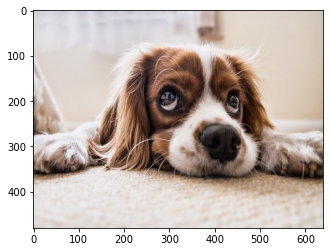

(640, 480)

In [2]:
r = Image.open('./computer_vision/fig/puppy.bmp')
plt.imshow(r)
plt.show()
r.size

In [3]:
m_size = 20
x_m = r.size[0] % m_size
y_m = r.size[1] % m_size
x_p = m_size -x_m
y_p = m_size -y_m
r_new = Image.new(r.mode, (r.size[0]+x_p, r.size[1]+y_p),(255,255,255)) # 사이즈의 흰색창을 생성
r_new.paste(r,(0,0)) # r 붙여넣기 (0,0)을 기준으로
r= r_new

In [4]:
r.size

(660, 500)

In [5]:
r.getpixel((0,0))

(214, 215, 220)

In [6]:
for i in range(0,r.size[0],m_size):
    for j in range(0, r.size[1],m_size):
        r_sum = 0
        g_sum = 0
        b_sum = 0
        for ii in range(i,i+m_size):
            for jj in range(j,j+m_size):
                rgb = r.getpixel((ii,jj))
                r_sum += rgb[0]
                g_sum += rgb[1]
                b_sum += rgb[2]
        r_a = round(r_sum/m_size**2)
        g_a = round(g_sum/m_size**2)
        b_a = round(b_sum/m_size**2)
        for ii in range(i, i+m_size):
            for jj in range(j, j+m_size):
                r.putpixel((ii,jj),(r_a,g_a,b_a))
        

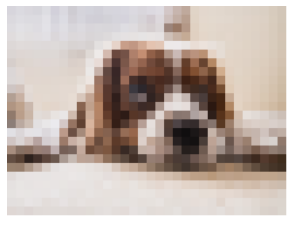

In [7]:
plt.imshow(r)
plt.axis('off')
plt.show()

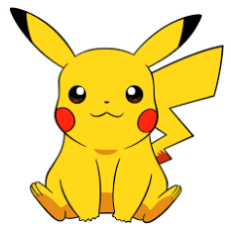

In [11]:
img = cv2.imread('./computer_vision/fig/pika.png', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

h,w = img.shape[:2]
m_size = 10
img = cv2.resize(img, (h-h%m_size,w-w%m_size))

plt.imshow(img)
plt.axis('off')
plt.show()

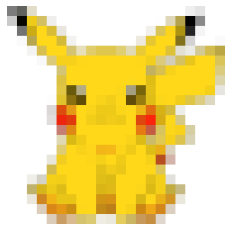

In [12]:
for i in range(0,img.shape[0], m_size):
    for j in range(0, img.shape[1], m_size):
        r_sum = 0
        g_sum = 0
        b_sum = 0
        for ii in range(i,i+m_size):
            for jj in range(j,j+m_size):
                rgb = img[ii,jj]
                r_sum += rgb[0]
                g_sum += rgb[1]
                b_sum += rgb[2]
        r_a = round(r_sum/m_size**2)
        g_a = round(g_sum/m_size**2)
        b_a = round(b_sum/m_size**2)
        for ii in range(i, i+m_size):
            for jj in range(j, j+m_size):
                img[ii,jj] = (r_a,g_a,b_a)
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
## 도트 cv2로 만들어보기 

img = cv2.imread('./computer_vision/fig/pika.png', cv2.IMREAD_COLOR)

kernel_3 = np.ones((3,3), np.float32)/9.

# dst_3 = cv2.filter2D(img, -1, kernel_3, -1)

img1 = cv2.blur(img, (25,25))

cv2.imshow('img', img1)

cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
def call_track(pos):
    n = cv2.getTrackbarPos('n', 'src')
    kernel_n = np.ones((2*n+1,2*n+1), np.float32)/((2.*n+1)**2)
    dst_3 = cv2.filter2D(src, -1, kernel_n, -1)
    cv2.imshow('src', dst_3)

   
src = cv2.imread('./computer_vision/fig/pika.png')

# kernel_n = np.ones((2n+1,2n+1), np.float32)/(2n+1**2).

# dst_3 = cv2.filter2D(src, -1, kernel_3, -1)

cv2.namedWindow('src')
cv2.createTrackbar('n', 'src', 0, 100, call_track)

cv2.waitKey()
cv2.destroyAllWindows()

In [13]:
# 칼라 이미지 도트 만들기
def call_track(pos):
    m_size = cv2.getTrackbarPos('m_size', 'image')
    m_size= m_size*5
    img1 = img.copy()
    for i in range(0,img1.shape[0], m_size):
        for j in range(0, img1.shape[1], m_size):
            r_sum = 0
            g_sum = 0
            b_sum = 0
            for ii in range(i,i+m_size):
                for jj in range(j,j+m_size):
                    rgb = img1[ii,jj]
                    b_sum += rgb[0]
                    g_sum += rgb[1]
                    r_sum += rgb[2]
            b_a = round(b_sum/m_size**2)
            g_a = round(g_sum/m_size**2)
            r_a = round(r_sum/m_size**2)
            for ii in range(i, i+m_size):
                for jj in range(j, j+m_size):
                    img1[ii,jj] = (b_a,g_a,r_a)
                    
    
    cv2.imshow('image', img1)


img = cv2.imread('./computer_vision/fig/stars.jpg', cv2.IMREAD_COLOR)


h,w = img.shape[:2]
# m_size = 10
img = cv2.resize(img, (h-h%m_size,w-w%m_size))


cv2.namedWindow('image')

cv2.createTrackbar('m_size', 'image', 1,20, call_track)

cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
# 칼라 이미지 도트 만들기 - 위와 동일
def call_track(pos):
    m_size = cv2.getTrackbarPos('m_size', 'image')
    m_size= m_size*5
    img1 = img.copy()
    for i in range(0,img1.shape[0], m_size):
        for j in range(0, img1.shape[1], m_size):
            r_sum = 0
            g_sum = 0
            b_sum = 0
            for ii in range(i,i+m_size):
                for jj in range(j,j+m_size):
                    rgb = img1[ii,jj]
                    b_sum += rgb[0]
                    g_sum += rgb[1]
                    r_sum += rgb[2]
            r_a = round(r_sum/m_size**2)
            g_a = round(g_sum/m_size**2)
            b_a = round(b_sum/m_size**2)
            for ii in range(i, i+m_size):
                for jj in range(j, j+m_size):
                    img1[ii,jj] = (b_a,g_a,r_a)
                    
    
    cv2.imshow('image', img1)


img = cv2.imread('./computer_vision/fig/pika.png', cv2.IMREAD_COLOR)


h,w = img.shape[:2]
# m_size = 10
img = cv2.resize(img, (h-h%m_size,w-w%m_size))


cv2.namedWindow('image')

cv2.createTrackbar('m_size', 'image', 1,20, call_track)

cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
# 흑백으로 도트 따보기
def call_track(pos):
    m_size = cv2.getTrackbarPos('m_size', 'image')
#     m_size= m_size*5
    img1 = img.copy()
    for i in range(0,img1.shape[0], m_size):
        for j in range(0, img1.shape[1], m_size):
            g_sum = 0
            for ii in range(i,i+m_size):
                for jj in range(j,j+m_size):
                    gra = img1[ii,jj]
                    g_sum += gra
            g_a = round(g_sum/m_size**2)
            for ii in range(i, i+m_size):
                for jj in range(j, j+m_size):
                    img1[ii,jj] = (g_a)
    
    cv2.imshow('image', img1)


img = cv2.imread('./computer_vision/fig/pika.png', cv2.IMREAD_GRAYSCALE)


h,w = img.shape[:2]
# m_size = 10
img = cv2.resize(img, (h-h%m_size,w-w%m_size))
img = 255 - cv2.Canny(img, 100,200)

cv2.namedWindow('image')

cv2.createTrackbar('m_size', 'image', 1,20, call_track)

cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
# 케니로 도트따기
def call_track(pos):
    m_size = cv2.getTrackbarPos('m_size', 'image')
#     m_size= m_size*5
    img1 = img.copy()
    for i in range(0,img1.shape[0], m_size):
        for j in range(0, img1.shape[1], m_size):
            g_sum = 0
            for ii in range(i,i+m_size):
                for jj in range(j,j+m_size):
                    gra = img1[ii,jj]
                    g_sum += gra
            g_a = round(g_sum/m_size**2)
            if g_a <200:
                g_a = 0
            else:
                g_a = 255
            for ii in range(i, i+m_size):
                for jj in range(j, j+m_size):
                    img1[ii,jj] = (g_a)
    
    cv2.imshow('image', img1)


img = cv2.imread('./computer_vision/fig/pika.png', cv2.IMREAD_GRAYSCALE)


h,w = img.shape[:2]
# m_size = 10
img = cv2.resize(img, (h-h%m_size,w-w%m_size))
img = 255- cv2.Canny(img, 100,200)

cv2.namedWindow('image')

cv2.createTrackbar('m_size', 'image', 1,20, call_track)

cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
## 이미지 도트 trackbar 사용시 나오는 오류
## m_size와 이미지shape 범위 차이 발생에 따른 오류
## m_size가 이미지shape의 공약수라면 오류 발생하지 않을것
## trackbar가 공약수만을 나타낸다면 오류 발생하지 않을것

In [ ]:
## 영상을 도트로 나타내기
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('Video open failed')
    sys.exit()

w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))    
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS)*0.7)

f_flag = False


while True:
    
    ret, frame = cap.read()
    
    if not ret:
        print('Video read failed')
        break
        

    frame1 = frame.copy()
    m_size = 10
    for i in range(0,h, m_size):
        for j in range(0, w, m_size):
            r_sum = 0
            g_sum = 0
            b_sum = 0
            for ii in range(i,i+m_size):
                for jj in range(j,j+m_size):
                    rgb = frame1[ii,jj]
                    b_sum += rgb[0]
                    g_sum += rgb[1]
                    r_sum += rgb[2]
            b_a = round(b_sum/m_size**2)
            g_a = round(g_sum/m_size**2)
            r_a = round(r_sum/m_size**2)
            for ii in range(i, i+m_size):
                for jj in range(j, j+m_size):
                    frame1[ii,jj] = (b_a,g_a,r_a)

#     cv2.imshow('image', frame)
    cv2.imshow('image1', frame1)
   
    key = cv2.waitKey(30)
    if key  == 27:
        break
 
        
cap.release()
cv2.destroyAllWindows()    

In [ ]:
## f 누르면 도트영상으로 바꾸기
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('Video open failed')
    sys.exit()

w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))    
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS)*0.7)

f_flag = False


while True:
    
    ret, frame = cap.read()
    
    if not ret:
        print('Video read failed')
        break
        
    
    frame1 = frame.copy()
    m_size = 10
    for i in range(0,h, m_size):
        for j in range(0, w, m_size):
            r_sum = 0
            g_sum = 0
            b_sum = 0
            for ii in range(i,i+m_size):
                for jj in range(j,j+m_size):
                    rgb = frame1[ii,jj]
                    b_sum += rgb[0]
                    g_sum += rgb[1]
                    r_sum += rgb[2]
            b_a = round(b_sum/m_size**2)
            g_a = round(g_sum/m_size**2)
            r_a = round(r_sum/m_size**2)
            for ii in range(i, i+m_size):
                for jj in range(j, j+m_size):
                    frame1[ii,jj] = (b_a,g_a,r_a)
    if f_flag:   
        frame1 = frame
        
        
#     cv2.imshow('image', frame)
    cv2.imshow('image1', frame1)
#     
    key = cv2.waitKey(30)
    if key  == 27:
        break
    elif key == ord('f'):
        f_flag = not f_flag
        
cap.release()
cv2.destroyAllWindows()    

In [ ]:
## 모자이크 처리 - blur
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('Video open failed')
    sys.exit()
    
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))    
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS)*0.7)

f_flag = False

while True:
    
    ret, frame = cap.read()
    
    if not ret:
        print('Video read failed')
        break
        
    frame1 = frame.copy()
    
  
    if f_flag:   
        frame1 = cv2.blur(frame, (25,25))
        
        
#     cv2.imshow('image', frame)
    cv2.imshow('image1', frame1)
#     
    key = cv2.waitKey(30)
    if key  == 27:
        break
    elif key == ord('f'):
        f_flag = not f_flag
        
cap.release()
cv2.destroyAllWindows()

In [ ]:
## 얼굴 모자이크   // 두명 이상일때 블러를 잘못하는 현상 생김

model = './computer_vision/download/facedetector/res10_300x300_ssd_iter_140000_fp16.caffemodel'
config = './computer_vision/download/facedetector/deploy.prototxt'

cap = cv2.VideoCapture(0)

f_flag = False

if not cap.isOpened():
    print('video open failed')
    sys.exit()
    
net = cv2.dnn.readNet(model,config)

if net.empty():
    print('net load failed')
    sys.exit()
    
while True:
    ret, frame = cap.read()
    
    if not ret:
        print('frame read failed')
        break
    
    blob = cv2.dnn.blobFromImage(frame, 1, (300,300), (104,177,123))
    net.setInput(blob) # 네트워크로 들어가라
    out = net.forward() #
    
    detect = out[0,0, :,:]
    h,w = frame.shape[:2]
    
        
    for i in range(detect.shape[0]):
        confidence = detect[i,2]
        if confidence > 0.5:
            x1 = int(detect[i,3]*w)
            y1 = int(detect[i,4]*h)
            x2 = int(detect[i,5]*w)
            y2 = int(detect[i,6]*h)
        
        
            face = cv2.rectangle(frame, (x1,y1), (x2,y2), (0,0,255), 2)
#             frame1 =  frame[y1:y2, x1:x2]
#             frame[y1:y2, x1:x2] = cv2.blur(frame1, (25,25))
            
#             text = 'Face : {}%'.format(round(confidence*100, 2))
            
#             cv2.putText(frame, text, (x1, y1-2), cv2.FONT_HERSHEY_COMPLEX,
#                         0.8, (0,0,255), 1, cv2.LINE_AA)

    if f_flag:   
        frame1 =  frame[y1:y2, x1:x2]
        frame[y1:y2, x1:x2] = cv2.blur(frame1, (25,25))
        
        
#     cv2.imshow('frame1', frame1)   
    cv2.imshow('frame', frame)
    
    
    key = cv2.waitKey(30)
    if key  == 27:
        break
    elif key == ord('f'):
        f_flag = not f_flag
        
cap.release()
cv2.destroyAllWindows()

In [ ]:
## 얼굴 모자이크 // 두명 이상일때 블러를 잘못하는 현상 생김 -> 대략적으로 수정

model = './computer_vision/download/facedetector/res10_300x300_ssd_iter_140000_fp16.caffemodel'
config = './computer_vision/download/facedetector/deploy.prototxt'

cap = cv2.VideoCapture(0)

f_flag = False

if not cap.isOpened():
    print('video open failed')
    sys.exit()
    
net = cv2.dnn.readNet(model,config)

if net.empty():
    print('net load failed')
    sys.exit()
    
while True:
    ret, frame = cap.read()
    
    if not ret:
        print('frame read failed')
        break
    
    blob = cv2.dnn.blobFromImage(frame, 1, (300,300), (104,177,123))
    net.setInput(blob) # 네트워크로 들어가라
    out = net.forward() #
    
    detect = out[0,0, :,:]
    h,w = frame.shape[:2]
    
    frame2 = frame.copy()
        
    for i in range(detect.shape[0]):
        confidence = detect[i,2]
        if confidence > 0.5:
            x1 = int(detect[i,3]*w)
            y1 = int(detect[i,4]*h)
            x2 = int(detect[i,5]*w)
            y2 = int(detect[i,6]*h)
        
        
            face = cv2.rectangle(frame, (x1,y1), (x2,y2), (0,0,255), 2)
            frame1 =  frame[y1:y2, x1:x2]
            frame[y1:y2, x1:x2] = cv2.blur(frame1, (25,25))
            
#             text = 'Face : {}%'.format(round(confidence*100, 2))
            
#             cv2.putText(frame, text, (x1, y1-2), cv2.FONT_HERSHEY_COMPLEX,
#                         0.8, (0,0,255), 1, cv2.LINE_AA)

    if f_flag:   
#         frame1 =  frame[y1:y2, x1:x2]
#         frame[y1:y2, x1:x2] = cv2.blur(frame1, (25,25))
        frame = frame2
        
#     cv2.imshow('frame1', frame1)   
    cv2.imshow('frame', frame)
    cv2.imshow('frame1', frame1)
    
    
    key = cv2.waitKey(30)
    if key  == 27:
        break
    elif key == ord('f'):
        f_flag = not f_flag
        
cap.release()
cv2.destroyAllWindows()

In [ ]:
# 얼굴 모자이크 // 두명 이상일때 블러를 잘못하는 현상 생김
## 대략적으로 수정 ver2/ 코드 간단히 정리까지 / 작동완료

model = './computer_vision/download/facedetector/res10_300x300_ssd_iter_140000_fp16.caffemodel'
config = './computer_vision/download/facedetector/deploy.prototxt'

cap = cv2.VideoCapture(0)

f_flag = False

if not cap.isOpened():
    print('video open failed')
    sys.exit()
    
net = cv2.dnn.readNet(model,config)

if net.empty():
    print('net load failed')
    sys.exit()
    
while True:
    ret, frame = cap.read()
    
    if not ret:
        print('frame read failed')
        break
    
    blob = cv2.dnn.blobFromImage(frame, 1, (300,300), (104,177,123))
    net.setInput(blob) # 네트워크로 들어가라
    out = net.forward() #
    
    detect = out[0,0, :,:]
    h,w = frame.shape[:2]
    

    frame1 = frame.copy()  
    for i in range(detect.shape[0]):
        confidence = detect[i,2]
        if confidence > 0.5:
            x1 = int(detect[i,3]*w)
            y1 = int(detect[i,4]*h)
            x2 = int(detect[i,5]*w)
            y2 = int(detect[i,6]*h)
        
        
            face = cv2.rectangle(frame, (x1,y1), (x2,y2), (0,0,255), 2)
            
            frame[y1:y2, x1:x2] = cv2.blur(frame[y1:y2, x1:x2], (25,25))
            
#             text = 'Face : {}%'.format(round(confidence*100, 2))
            
#             cv2.putText(frame, text, (x1, y1-2), cv2.FONT_HERSHEY_COMPLEX,
#                         0.8, (0,0,255), 1, cv2.LINE_AA)

    if f_flag:   
        frame = frame1
          
    cv2.imshow('frame', frame)
    cv2.imshow('frame1', frame1)
    
    
    key = cv2.waitKey(30)
    if key  == 27:
        break
    elif key == ord('f'):
        f_flag = not f_flag
        
cap.release()
cv2.destroyAllWindows()

In [ ]:
## 도트 이미지로 해보자 // 외곽 얼굴 인식범위가 frame 범위를 벗어날때 오류발생/작동완료
model = './computer_vision/download/facedetector/res10_300x300_ssd_iter_140000_fp16.caffemodel'
config = './computer_vision/download/facedetector/deploy.prototxt'

cap = cv2.VideoCapture(0)

f_flag = False

if not cap.isOpened():
    print('video open failed')
    sys.exit()

w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS)*0.7)
fourcc = cv2.VideoWriter_fourcc(*'DIVX')

# sv = cv2.VideoWriter('mosaic.avi',fourcc, fps, (w,h))

net = cv2.dnn.readNet(model,config)

if net.empty():
    print('net load failed')
    sys.exit()
    
while True:
    ret, frame = cap.read()
    
    if not ret:
        print('frame read failed')
        break
    
    blob = cv2.dnn.blobFromImage(frame, 1, (300,300), (104,177,123))
    net.setInput(blob) # 네트워크로 들어가라
    out = net.forward() #
    
    detect = out[0,0, :,:]
    h,w = frame.shape[:2]
    
    frame1 = frame.copy()
        
    for i in range(detect.shape[0]):
        confidence = detect[i,2]
        if confidence > 0.5:
            x1 = int(detect[i,3]*w)
            y1 = int(detect[i,4]*h)
            x2 = int(detect[i,5]*w)
            y2 = int(detect[i,6]*h)
            
        
            face = cv2.rectangle(frame, (x1,y1), (x2,y2), (0,0,255), 2)
            
#             frame1 = frame.copy()
            m_size = 10
            for i in range(y1,y2, m_size):
                for j in range(x1, x2, m_size):
                    r_sum = 0
                    g_sum = 0
                    b_sum = 0
                    if  i > 469 or j >619:
                        i = 469
                        j = 619
                    for ii in range(i,i+m_size):
                        for jj in range(j,j+m_size):
                            rgb = frame1[ii,jj]
                            b_sum += rgb[0]
                            g_sum += rgb[1]
                            r_sum += rgb[2]
                    b_a = round(b_sum/m_size**2)
                    g_a = round(g_sum/m_size**2)
                    r_a = round(r_sum/m_size**2)
                    for ii in range(i, i+m_size):
                        for jj in range(j, j+m_size):
                            frame[ii,jj] = (b_a,g_a,r_a)
#             text = 'Face : {}%'.format(round(confidence*100, 2))
            
#             cv2.putText(frame, text, (x1, y1-2), cv2.FONT_HERSHEY_COMPLEX,
#                         0.8, (0,0,255), 1, cv2.LINE_AA)

            if f_flag:   
                frame = frame1
        
#     sv.write(frame)
    cv2.imshow('frame', frame)

    
    
    key = cv2.waitKey(30)
    if key  == 27:
        break
    elif key == ord('f'):
        f_flag = not f_flag
        
cap.release()
# sv.release()
cv2.destroyAllWindows()

In [ ]:
# --------------- 간단한 코드로 실행 -------------------

In [ ]:
img = cv2.imread('./computer_vision/fig/pika.png', cv2.IMREAD_COLOR)

h,w = img.shape[:2]
# print(h,w)

img = cv2.resize(img, (w//7,h//7))
img = cv2.resize(img, (w,h))

cv2.imshow('img', img)

cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
## 도트 이미지로 해보자// 코드 간단정리 완료
## 프레임 바깥에서 실행 안됨...ㅠ
model = './computer_vision/download/facedetector/res10_300x300_ssd_iter_140000_fp16.caffemodel'
config = './computer_vision/download/facedetector/deploy.prototxt'

cap = cv2.VideoCapture(0)

f_flag = False

if not cap.isOpened():
    print('video open failed')
    sys.exit()

w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS)*0.7)
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
# print(h,w)
# sv = cv2.VideoWriter('mosaic.avi',fourcc, fps, (w,h))

net = cv2.dnn.readNet(model,config)

if net.empty():
    print('net load failed')
    sys.exit()
    
while True:
    ret, frame = cap.read()
    
    if not ret:
        print('frame read failed')
        break
    
    blob = cv2.dnn.blobFromImage(frame, 1, (300,300), (104,177,123)) #이미지 전처리
    net.setInput(blob) # 네트워크로 들어가라
    out = net.forward() #
    
    detect = out[0,0, :,:]
    h,w = frame.shape[:2]
    
   
        
    for i in range(detect.shape[0]):
        confidence = detect[i,2]
        if confidence > 0.5:
            x1 = int(detect[i,3]*w)
            y1 = int(detect[i,4]*h)
            x2 = int(detect[i,5]*w)
            y2 = int(detect[i,6]*h)
#             print(x1,y1,x2,y2)
                
        
            face = cv2.rectangle(frame, (x1,y1), (x2,y2), (0,0,255), 2)
            
                
            frame2 = frame.copy()
            frame1 = frame[y1:y2,x1:x2]
            
            frame1 = cv2.resize(frame1, ((x2-x1)//10,(y2-y1)//10))
                                
            frame1 = cv2.resize(frame1, (x2-x1, y2-y1), interpolation =cv2.INTER_AREA)
            
            frame2[y1:y2,x1:x2] = frame1

#             text = 'Face : {}%'.format(round(confidence*100, 2))
            
#             cv2.putText(frame, text, (x1, y1-2), cv2.FONT_HERSHEY_COMPLEX,
#                         0.8, (0,0,255), 1, cv2.LINE_AA)

            if f_flag:   
                frame = frame2
        
#     sv.write(frame)
    cv2.imshow('frame', frame)

    
    
    key = cv2.waitKey(30)
    if key  == 27:
        break
    elif key == ord('f'):
        f_flag = not f_flag
        
cap.release()
# sv.release()
cv2.destroyAllWindows()

In [ ]:
### 도트 이미지 만들기 -> for 문을 활용하여 픽셀변화가 효과적이다
### 모자이크 처리 -> 도트 이미지 처리를 하면 연산시간이 오래걸리 때문에
### resize를 활용하여 간단하게 변경 or filtering을 사용하는것이 좋아보인다.

In [ ]:
## f 누르면 도트영상으로 바꾸기
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('Video open failed')
    sys.exit()

# w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))    
# h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
# fps = int(cap.get(cv2.CAP_PROP_FPS)*0.7)

f_flag = False


while True:
    
    ret, frame = cap.read()
    
    if not ret:
        print('Video read failed')
        break
        
    h,w = frame.shape[:2]
    
    frame1 = frame.copy()
    frame1 = cv2.resize(frame1, (w//10, h//10))
    frame1 = cv2.resize(frame1, (w,h), interpolation = cv2.INTER_AREA)    
    
    
    if f_flag:   
        frame = frame1
        
        
    cv2.imshow('image', frame)
    
#     
    key = cv2.waitKey(30)
    if key  == 27:
        break
    elif key == ord('f'):
        f_flag = not f_flag
        
cap.release()
cv2.destroyAllWindows()    

In [ ]:
## 트랙바로 모자이크 크기조절
def onChange(x):
    pass

def setting():
    cv2.namedWindow('set')
    
    cv2.createTrackbar('m_size', 'set', 1, 100, onChange)


setting()

f_flag = False

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('Video open failed')
    sys.exit()


while True:

    ret, frame = cap.read()

    if not ret:
        print('Video read failed')
        break

    m_size = cv2.getTrackbarPos('m_size', 'set')
    if m_size == 0:
        m_size = 1
    
    h,w = frame.shape[:2]  

    frame1 = frame.copy()
    frame1 = cv2.resize(frame1, (w//m_size, h//m_size))
    frame1 = cv2.resize(frame1, (w,h), interpolation = cv2.INTER_AREA)
    
    text = 'm_size = {}'.format(m_size)
    
    cv2.putText(frame1, text , (0,50), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 0, 255), 1, cv2.LINE_AA)
    
    if f_flag:   
        frame1 = frame
        cv2.putText(frame, 'nomo' , (0,50), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 0, 255), 1, cv2.LINE_AA)

    cv2.imshow('image', frame1)
    
    key = cv2.waitKey(30)
    if key  == 27:
        break
    elif key == ord('f'):
        f_flag = not f_flag
  

cap.release()
cv2.destroyAllWindows()

In [ ]:
## 트랙바로 모자이크 크기조절/ 얼굴 2개일때 하나만 인식
model = './computer_vision/download/facedetector/res10_300x300_ssd_iter_140000_fp16.caffemodel'
config = './computer_vision/download/facedetector/deploy.prototxt'

def onChange(x):
    pass

def setting():
    cv2.namedWindow('set')
    
    cv2.createTrackbar('m_size', 'set', 1, 100, onChange)


setting()

f_flag = False

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('Video open failed')
    sys.exit()

net = cv2.dnn.readNet(model,config)
    
while True:

    ret, frame = cap.read()

    if not ret:
        print('Video read failed')
        break

    m_size = cv2.getTrackbarPos('m_size', 'set')
    if m_size == 0:
        m_size = 1
    
    blob = cv2.dnn.blobFromImage(frame, 1, (300,300), (104,177,123)) #이미지 전처리
    net.setInput(blob) # 네트워크로 들어가라
    out = net.forward() #
    
    detect = out[0,0, :,:]
    h,w = frame.shape[:2]
    
   
        
    for i in range(detect.shape[0]):
        confidence = detect[i,2]
        if confidence > 0.5:
            x1 = int(detect[i,3]*w)
            y1 = int(detect[i,4]*h)
            x2 = int(detect[i,5]*w)
            y2 = int(detect[i,6]*h)
#             print(x1,y1,x2,y2)
                
        
            cv2.rectangle(frame, (x1,y1), (x2,y2), (0,0,255), 2)  

            frame2 = frame.copy()
            frame1 = frame[y1:y2,x1:x2]
            
            frame1 = cv2.resize(frame1, ((x2-x1)//m_size,(y2-y1)//m_size))
                                
            frame1 = cv2.resize(frame1, (x2-x1, y2-y1), interpolation =cv2.INTER_AREA)
            
            frame[y1:y2,x1:x2] = frame1
    
            if f_flag:   
                frame2 = frame
                cv2.putText(frame, 'nomo' , (0,50), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 0, 255), 1, cv2.LINE_AA)
        
    cv2.imshow('image', frame)
        
    text = 'm_size = {}'.format(m_size)
    
    cv2.putText(frame1, text , (0,50), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 0, 255), 1, cv2.LINE_AA)
    
    

    
    
    key = cv2.waitKey(30)
    if key  == 27:
        break
    elif key == ord('f'):
        f_flag = not f_flag
  

cap.release()
cv2.destroyAllWindows()

In [14]:
## 트랙바로 모자이크 크기조절/ 
##얼굴 2개일때 하나만 인식 -> 수정완료
## f 키눌렀을때 모자이크 삭제 -> 완료
## 트랙바로 모자이크 조절 -> 완료
## 모자이크 사이즈 텍스트로 표현 -> 완료 
model = './computer_vision/download/facedetector/res10_300x300_ssd_iter_140000_fp16.caffemodel'
config = './computer_vision/download/facedetector/deploy.prototxt'

def onChange(x):
    pass

def setting():
    cv2.namedWindow('set')
    
    cv2.createTrackbar('m_size', 'set', 1, 100, onChange)


setting()

f_flag = False

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('Video open failed')
    sys.exit()

net = cv2.dnn.readNet(model,config)
    
while True:

    ret, frame = cap.read()

    if not ret:
        print('Video read failed')
        break

    m_size = cv2.getTrackbarPos('m_size', 'set')
    if m_size == 0:
        m_size = 1
    
    blob = cv2.dnn.blobFromImage(frame, 1, (300,300), (104,177,123)) #이미지 전처리
    net.setInput(blob) # 네트워크로 들어가라
    out = net.forward() #
    
    detect = out[0,0, :,:]
    h,w = frame.shape[:2]
    
   
        
    for i in range(detect.shape[0]):
        confidence = detect[i,2]
        if confidence > 0.5:
            x1 = int(detect[i,3]*w)
            y1 = int(detect[i,4]*h)
            x2 = int(detect[i,5]*w)
            y2 = int(detect[i,6]*h)
#             print(x1,y1,x2,y2)
                
        
            cv2.rectangle(frame, (x1,y1), (x2,y2), (0,0,255), 2)  

            frame2 = frame.copy()
            frame1 = frame[y1:y2,x1:x2]
            
            frame1 = cv2.resize(frame1, ((x2-x1)//m_size,(y2-y1)//m_size))
                                
            frame1 = cv2.resize(frame1, (x2-x1, y2-y1), interpolation =cv2.INTER_AREA)
            
            frame[y1:y2,x1:x2] = frame1
            
            text = 'm_size = {}'.format(m_size)
    
            cv2.putText(frame, text , (0,20), cv2.FONT_HERSHEY_COMPLEX, 0.7, (0, 0, 255), 1, cv2.LINE_AA)
    
            if f_flag:   
                frame = frame2
                cv2.putText(frame, 'nomo' , (0,20), cv2.FONT_HERSHEY_COMPLEX, 0.7, (0, 0, 255), 1, cv2.LINE_AA)
        
    cv2.imshow('image', frame)
        
    
    key = cv2.waitKey(30)
    if key  == 27:
        break
    elif key == ord('f'):
        f_flag = not f_flag
  

cap.release()
cv2.destroyAllWindows()